
# The Sparks Foundation
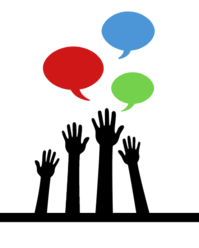</img><br>

### Internship Task

#### by - Akash Mhaske

# Score Prediction

In this notebook, we'll build a linear regression model to predict `Scores` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#importing neccessary package - pandas, numpy, matplotlib and seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset

score = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#Displaying the head

score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking the shape of Dataframe

score.shape

(25, 2)

In [5]:
#Inspecting the datatype and presence of missing values or null values

score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The data is clean and ready for further analysis

## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll make a scatterplot to see if the Scores and Hours show linear relationship.

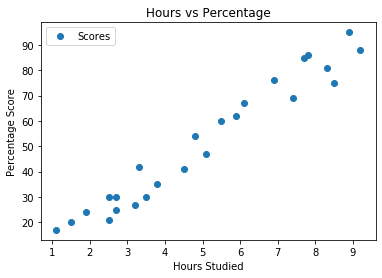

In [6]:
#Visualising the relationship between Scores and Hours

score.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Inference:
- Scores and Hours are forming linear relationship here, which makes data good for Linear Regression.

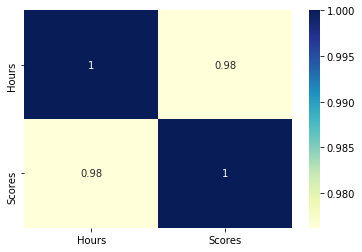

In [7]:
#Visualising the correlation between score and hours using heatmap

sns.heatmap(score.corr(),cmap="YlGnBu", annot = True)
plt.show()

- The annotated values in the heatmap gives a value for correlation between scores and hours confirming a strong correlation.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = mx + c$

-  $y$ is the Scores
-  $c$ is the intercept
-  $m$ is the coefficient for the Hours<br>

In our case:

$y = m \times Hours +c$

The $m$ value is called the model **coefficient** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [8]:
#Dividing the dataset into independent 'X' and dependent/target variable 'y'

X = score['Hours']
y = score['Scores']

## Splitting the dataframes into train set and test set

### 70% of data will be used for training the model and 30% data will be used for testing the accuracy of the model.

In [9]:
#Importing the library for spliting the dataframe into train set and test set
from sklearn.model_selection import train_test_split

#Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
#Displaying the train set

X_train.head(), X_test.head()

(6     9.2
 12    4.5
 4     3.5
 24    7.8
 0     2.5
 Name: Hours, dtype: float64,
 9     2.7
 22    3.8
 13    3.3
 11    5.9
 5     1.5
 Name: Hours, dtype: float64)

#### Building a Linear Model

We will import the `statsmodel.api` library using which we 'll perform the linear regression.

In [11]:
#Importing statsmodels library to fit a line

import statsmodels.api as sm

In [12]:
#Adding a bias/constant to get an intercept

X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm).fit()

In [13]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.15e-11
Time:                        19:05:33   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

##### 1. The coefficient for Hours is 9.87, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.957
Meaning that 95.7% of the variance in `Scores` is explained by `Hours`

This is a very good R-squared value.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 9.87 \times Hours + 1.495$

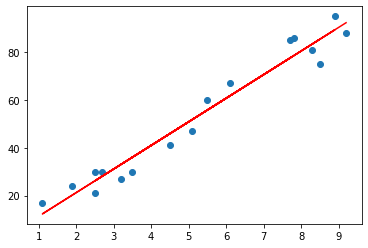

In [14]:
#Visualising the best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, 1.50 + 9.87*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
Validating assumptions of the model

#### Distribution of the error terms
Checking if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), Checking this through histogram

In [15]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

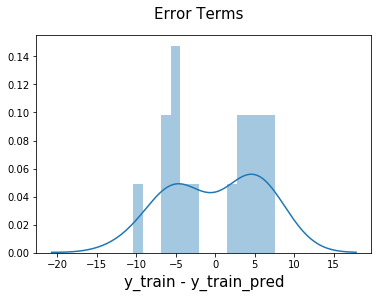

In [16]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!


#### Looking for patterns in the residuals

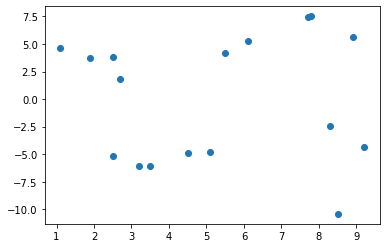

In [17]:
plt.scatter(X_train,res)
plt.show()

Error terms are independent of each other

## Step 5: Predictions on the Test Set

Now that we have a fitted regression line on your train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the `X_test` data like we did for `X_train` and then we can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [18]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [19]:
# Predict the y values corresponding to X_test_sm

y_pred = lr.predict(X_test_sm)

In [20]:
# Displaying the head of the dataset

y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

## Evaluating the model

Mean Absolute Error - 
<br>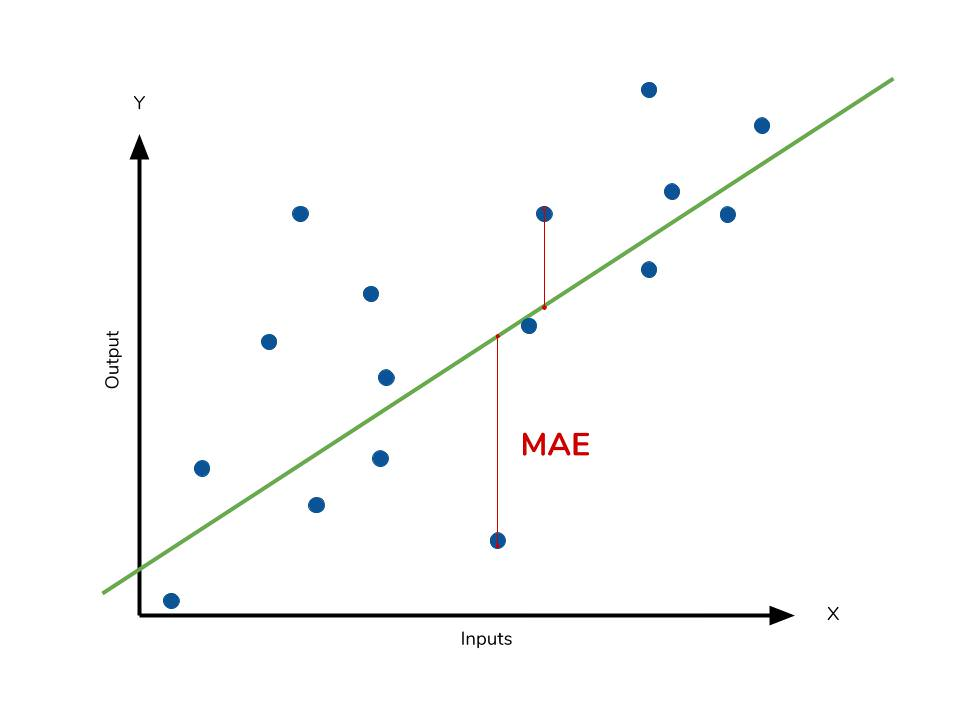</img>

In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [22]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.762517892332271


In [23]:
#Predicting if a student studies for 2.25 hours what will be his score

y_pred = lr.predict([1,9.25])

In [24]:
#The score will be

print('If a student studies for 9.25 hours his score will be {}%'.format(round(y_pred[0],2)))

If a student studies for 9.25 hours his score will be 92.81%
